# Universidade Federal Rural do Semi-Árido
# Modelagem Computacional
**Nome: Daniel da Silva Santos**

## Atividade 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Uma caixa de comprimento infinito e laterais de 1mx1,5m, possui seus quatro lados ao logo deste comprimento isolados entre si eletricamente, o lado superior é submetido a uma diferença de potencial de 40V, o lado esquerda é aterrado, com uma ddp de zero V, o lado direita é submetido a um potencial elétrico de 100V e o lado de baixo tem um potencial elétrico de 10 V, todos com relação ao terra. Faça o que se pede:
### a. Usando o Excel, determine o potencial elétrico dentro da caixa e construa um gráfico de superfície para representar o potencial elétrico em seu interior.
### b. Escreva um programa, em qualquer linguagem de programação, para realizar o mesmo cálculo que no item anterior, e com o resultado apresente um gráfico de superfície, após isso compare os dois resultados.

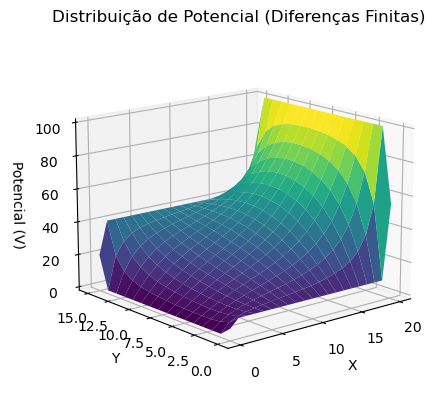

In [54]:
V1 = 10
V2 = 100
V3 = 40
V4 = 0

nx=21
ny=16
v = np.zeros((nx, ny))

v[:, 0] = V1
v[:, ny-1] = V3
v[0, :] = V4
v[nx-1, :] = V2

v[0, 0] = 0.5*(V1 + V4)
v[nx-1, 0] = 0.5*(V1 + V2)
v[0, ny-1] = 0.5*(V3 + V4)
v[nx-1, ny-1] = 0.5*(V2 + V3)

ni = 200

for k in range(ni):
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            v[i,j] = 0.25*( v[i+1,j] + v[i-1, j] + v[i, j+1] + v[i, j-1] )

x = np.linspace(0, nx-1, nx)
y = np.linspace(0, ny-1, ny)
X, Y = np.meshgrid(x, y)
Z = v.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.view_init(elev=15, azim=230)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potencial (V)')
ax.set_title('Distribuição de Potencial (Diferenças Finitas)')

plt.show()